In [1]:
import pandas as pd
import gzip
import json
import os
from collections import Counter
import pickle as pkl
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerTuple


In [13]:
counts = {}
counts["favor"] = []
counts["against"] = []
counts["false"] = []
counts["true"] = []
counts["entails"] = []
counts["contradicts"] = []

for f in os.listdir("/data2/sg/racball/flan_v2/"):
    data_input, data_target = [], []
    print(f)
    if "dialog_fs_opt_train.jsonl.gz" in f:           
        with gzip.open(f"/data2/sg/racball/flan_v2/{f}", 'r') as fin:
            for index,line in enumerate(fin):
                if index%99999 == 0 and index!= 0:
                    print("breaking")
                    data_input.extend([json.loads(line)['inputs']])
                    data_ = [i.split() for i in data_input]
                    data_ = [item for sublist in data_ for item in sublist]
                    # data_target.extend([json.loads(line)['targets'] for line in fin])
                    d = Counter(data_)
                    counts["favor"].append(d["favor"])
                    counts["against"].append(d["against"]) 
                    counts["false"].append(d["false"]) 
                    counts["true"].append(d["true"]) 
                    counts["entails"].append(d["entails"]) 
                    counts["contradicts"].append(d["contradicts"]) 
                    data_input = []
                    continue
                else:
                    data_input.extend([json.loads(line)['inputs']])
        
        data_ = [i.split() for i in data_input]
        data_ = [item for sublist in data_ for item in sublist]
        # data_target.extend([json.loads(line)['targets'] for line in fin])
        d = Counter(data_)
        counts["favor"].append(d["favor"])
        counts["against"].append(d["against"]) 
        counts["false"].append(d["false"]) 
        counts["true"].append(d["true"]) 
        counts["entails"].append(d["entails"]) 
        counts["contradicts"].append(d["contradicts"]) 
        break

.git
.gitattributes
README.md
cot_fs_noopt_train.jsonl.gz
cot_fs_opt_train.jsonl.gz
cot_zs_noopt_train.jsonl.gz
cot_zs_opt_train.jsonl.gz
dialog_fs_noopt_train.jsonl.gz
dialog_fs_opt_train.jsonl.gz
breaking
breaking
breaking
breaking
breaking
breaking
breaking
breaking


KeyboardInterrupt: 

In [4]:
d

{'positive': [134],
 'negative': [52],
 'favor': [16],
 'against': [2077],
 'false': [14],
 'true': [4556],
 'entails': [1],
 'contradicts': [0],
 'Positive': [5],
 'Negative': [0],
 'Favor': [0],
 'Against': [5],
 'False': [1],
 'True': [8],
 'Entails': [0],
 'Contradicts': [0]}

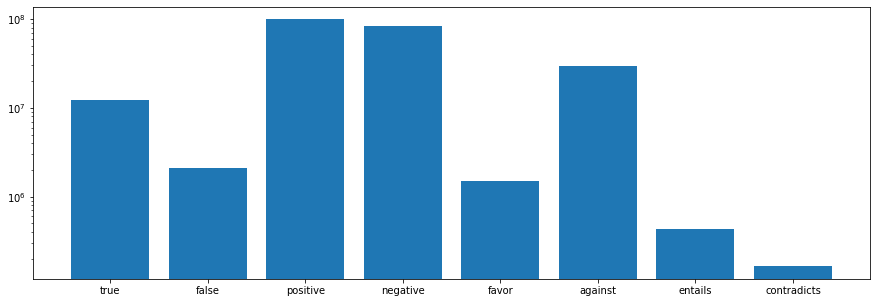

In [5]:
unigrams = defaultdict(list)
for file in os.listdir("../data/unigrams_flanv2/"):
    if ".pkl" in file:
        with open(f"../data/unigrams_flanv2/{file}","rb") as f:
            d = pkl.load(f)
        d = {k:sum(v) for k,v in d.items()}
        for k in d.keys():
            unigrams[k].append(d[k])
        

unigrams = {k:sum(v) for k,v in unigrams.items()}

plt.bar(['true','false','positive','negative','favor','against','entails','contradicts'],
[unigrams['true'] + unigrams['True'],
unigrams['false'] + unigrams['False'],
unigrams['positive'] + unigrams['Positive'],
unigrams['negative'] + unigrams['Negative'],
unigrams['favor'] + unigrams['Favor'],
unigrams['against'] + unigrams['Against'],
unigrams['entails'] + unigrams['Entails'],
unigrams['contradicts'] + unigrams['Contradicts']])
plt.rcParams['figure.figsize'] = (15,5)
plt.yscale('log')

In [39]:
unigrams

{'positive': 86253982,
 'negative': 71674296,
 'favor': 1483608,
 'against': 28816037,
 'false': 1537473,
 'true': 11224934,
 'entails': 434162,
 'contradicts': 162466,
 'Positive': 12950082,
 'Negative': 12832656,
 'Favor': 30682,
 'Against': 745228,
 'False': 539829,
 'True': 1096213,
 'Entails': 947,
 'Contradicts': 911}

No handles with labels found to put in legend.


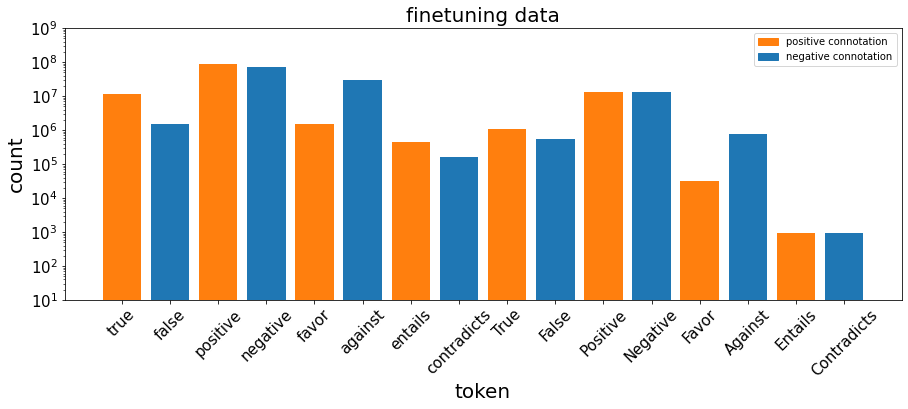

In [61]:
x = ['true','false','positive','negative','favor','against','entails','contradicts',
     'True','False','Positive','Negative','Favor','Against','Entails','Contradicts'
    ]
plt.bar(x,[unigrams[i] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4'])

plt.yscale('log')
plt.ylim(10,10**9)
plt.ylabel('count',fontsize=20)
plt.xlabel('token',fontsize=20)
_ = plt.xticks(rotation = 45,fontsize=15)
_ = plt.yticks(fontsize=15)
# plt.title("unique_bigram_counts",fontsize=15)
plt.rcParams['figure.figsize'] = (15,5)
plt.legend(prop={'size':15})
plt.title("finetuning data",size = 20)

P = mpatches.Patch(color='#ff7f0e', label='positive connotation')
N = mpatches.Patch(color='#1f77b4', label='negative connotation')
plt.legend(handles=[P,N], loc='upper right',prop={'size':10})

In [2]:
bi = {}
uni = {}

for target in ["true","false","positive","negative","favor","against","entails","contradicts",
               "True","False","Positive","Negative","Favor","Against","Entails","Contradicts"]:
    print(target)
    global_bigrams = {}
    for file in os.listdir("../data/bigrams_flanv2/"):
        if target in file:
            with open(f"../data/bigrams_flanv2/{file}","rb") as f:
                local_bigrams = pkl.load(f)
            for k in local_bigrams.keys():
                if k in global_bigrams.keys():
                    global_bigrams[k] = global_bigrams[k] + local_bigrams[k]
                else:
                    global_bigrams[k] = local_bigrams[k]

        bi[target] = len(global_bigrams)
        uni[target] = sum(global_bigrams.values())

true
false
positive
negative
favor
against
entails
contradicts
True
False
Positive
Negative
Favor
Against
Entails
Contradicts


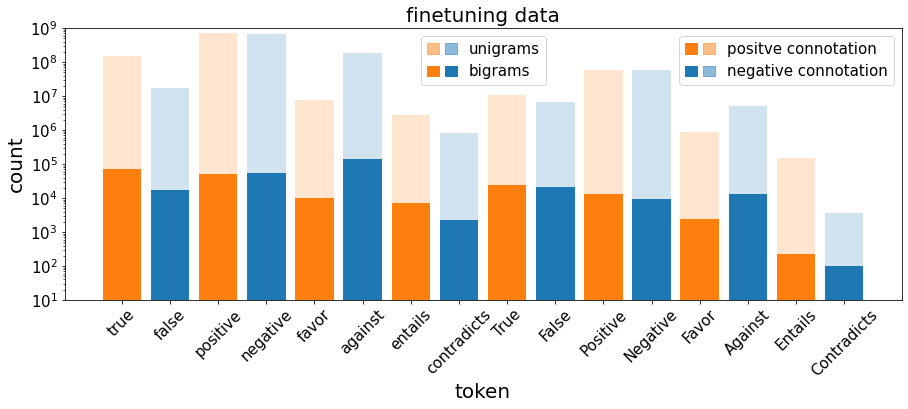

In [6]:
x = ['true','false','positive','negative','favor','against','entails','contradicts',
     'True','False','Positive','Negative','Favor','Against','Entails','Contradicts'
    ]
plt.bar(x,[uni[i] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4'],alpha=0.2,label='unigrams')
plt.bar(x,[bi[i] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4'],label='bigrams')

plt.yscale('log')
plt.ylim(10,10**9)
plt.ylabel('count',fontsize=20)
plt.xlabel('token',fontsize=20)
_ = plt.xticks(rotation = 45,fontsize=15)
_ = plt.yticks(fontsize=15)
# plt.title("unique_bigram_counts",fontsize=15)
plt.rcParams['figure.figsize'] = (15,5)
plt.legend(prop={'size':15})
plt.title("finetuning data",size = 20)

P1 = mpatches.Patch(color='#ff7f0e')
P2 = mpatches.Patch(color='#ff7f0e', alpha = 0.5)
N1 = mpatches.Patch(color='#1f77b4')
N2 = mpatches.Patch(color='#1f77b4', alpha = 0.5)
first_legend = plt.legend(handles=[(P1,P2),(N1,N2)], 
                          labels = ['positve connotation', 'negative connotation'],
                          loc='upper right',
                          prop={'size':15},
                          handler_map={tuple: HandlerTuple(ndivide=None)})
ax = plt.gca().add_artist(first_legend)

U1 = mpatches.Patch(color='#ff7f0e', alpha = 0.5)
U2 = mpatches.Patch(color='#1f77b4', alpha = 0.5)
B1 = mpatches.Patch(color='#ff7f0e')
B2 = mpatches.Patch(color='#1f77b4')
plt.legend(handles=[(U1,U2),(B1,B2)], 
           labels = ['unigrams', 'bigrams'],
           loc='upper center',
           prop={'size':15},
           handler_map={tuple: HandlerTuple(ndivide=None)})

# training + instruction tuning

In [9]:
bi_train = {}
uni_train = {}

for target in ["true","false","positive","negative","favor","against","entails","contradicts",
               "True","False","Positive","Negative","Favor","Against","Entails","Contradicts"]:
    print(target)
    global_bigrams = {}
    for start in range(0,1050,50):
        finish = start + 50
        with open(f"../data/bigrams/bigrams_{start}_{finish}--{target}.pkl","rb") as f:
            local_bigrams = pkl.load(f)
        for k in local_bigrams.keys():
            if k in global_bigrams.keys():
                global_bigrams[k] = global_bigrams[k] + local_bigrams[k]
            else:
                global_bigrams[k] = local_bigrams[k]

    bi_train[target] = len(global_bigrams)
    uni_train[target] = sum(global_bigrams.values())

true
false
positive
negative
favor
against
entails
contradicts
True
False
Positive
Negative
Favor
Against
Entails
Contradicts


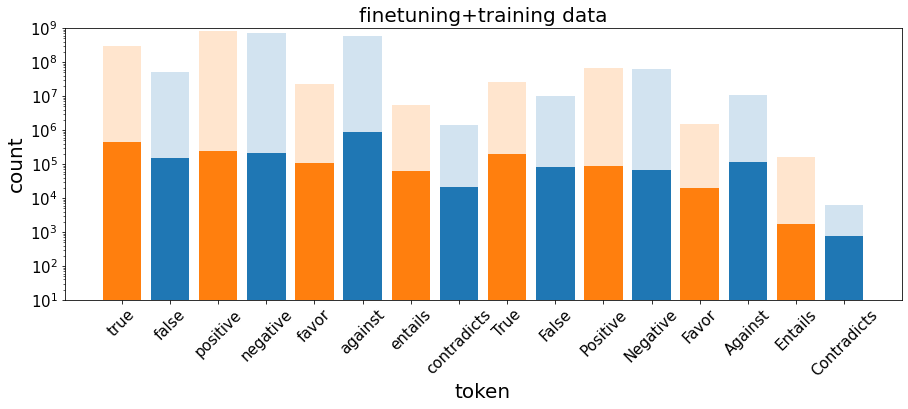

In [24]:
x = ['true','false','positive','negative','favor','against','entails','contradicts',
     'True','False','Positive','Negative','Favor','Against','Entails','Contradicts'
    ]
plt.bar(x,[uni[i]+uni_train[i] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4'],alpha=0.2,label='unigrams')
plt.bar(x,[bi[i]+bi_train[i] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4'],label='bigrams')

plt.yscale('log')
plt.ylim(10,10**9)
plt.ylabel('count',fontsize=20)
plt.xlabel('token',fontsize=20)
_ = plt.xticks(rotation = 45,fontsize=15)
_ = plt.yticks(fontsize=15)
# plt.title("unique_bigram_counts",fontsize=15)
plt.rcParams['figure.figsize'] = (15,5)
plt.title("finetuning+training data",size = 20)

P1 = mpatches.Patch(color='#ff7f0e')
P2 = mpatches.Patch(color='#ff7f0e', alpha = 0.5)
N1 = mpatches.Patch(color='#1f77b4')
N2 = mpatches.Patch(color='#1f77b4', alpha = 0.5)
# first_legend = plt.legend(handles=[(P1,P2),(N1,N2)], 
#                           labels = ['positve connotation', 'negative connotation'],
#                           loc='upper right',
#                           prop={'size':15},
#                           handler_map={tuple: HandlerTuple(ndivide=None)})
# ax = plt.gca().add_artist(first_legend)

U1 = mpatches.Patch(color='#ff7f0e', alpha = 0.5)
U2 = mpatches.Patch(color='#1f77b4', alpha = 0.5)
B1 = mpatches.Patch(color='#ff7f0e')
B2 = mpatches.Patch(color='#1f77b4')
# plt.legend(handles=[(U1,U2),(B1,B2)], 
#            labels = ['unigrams', 'bigrams'],
#            loc='upper center',
#            prop={'size':15},
#            handler_map={tuple: HandlerTuple(ndivide=None)})

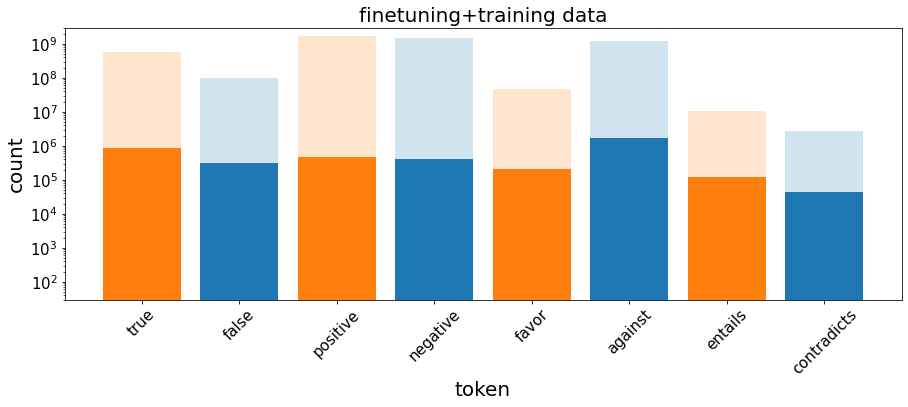

In [30]:
x = ['true','false','positive','negative','favor','against','entails','contradicts']
plt.bar(x,[uni[i]+uni_train[i]+uni[i.lower()]+uni_train[i.lower()] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4'],alpha=0.2,label='unigrams')
plt.bar(x,[bi[i]+bi_train[i]+bi[i.lower()]+bi_train[i.lower()] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4'],label='bigrams')

plt.yscale('log')
# plt.ylim(10,3*10**9)
plt.ylim(3*10,3*10**9)

plt.ylabel('count',fontsize=20)
plt.xlabel('token',fontsize=20)
_ = plt.xticks(rotation = 45,fontsize=15)
_ = plt.yticks(fontsize=15)
# plt.title("unique_bigram_counts",fontsize=15)
plt.rcParams['figure.figsize'] = (15,5)
plt.title("finetuning+training data",size = 20)

P1 = mpatches.Patch(color='#ff7f0e')
P2 = mpatches.Patch(color='#ff7f0e', alpha = 0.5)
N1 = mpatches.Patch(color='#1f77b4')
N2 = mpatches.Patch(color='#1f77b4', alpha = 0.5)
# first_legend = plt.legend(handles=[(P1,P2),(N1,N2)], 
#                           labels = ['positve connotation', 'negative connotation'],
#                           loc='upper right',
#                           prop={'size':15},
#                           handler_map={tuple: HandlerTuple(ndivide=None)})
# ax = plt.gca().add_artist(first_legend)

U1 = mpatches.Patch(color='#ff7f0e', alpha = 0.5)
U2 = mpatches.Patch(color='#1f77b4', alpha = 0.5)
B1 = mpatches.Patch(color='#ff7f0e')
B2 = mpatches.Patch(color='#1f77b4')
# plt.legend(handles=[(U1,U2),(B1,B2)], 
#            labels = ['unigrams', 'bigrams'],
#            loc='upper center',
#            prop={'size':15},
#            handler_map={tuple: HandlerTuple(ndivide=None)})